# Child Care Inspection Project
## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
from scipy import stats
import json
import requests
import folium
from IPython.display import HTML,display

## Load data

In [2]:
df= pd.read_csv('Child_Care_NewY_Dataset.csv', low_memory=False)
df.head()
pd.set_option('display.max_rows', 1000)
sns.set_style("white")

In [3]:
#Set index to regions
df.set_index(['Borough'], inplace=True)
data=df.sort_index()

In [4]:
data.head()

CenterName  \
Borough                                           
BRONX                                      SBCC   
BRONX    CRESTON AVENUE BAPTIST SUMMER DAY CAMP   
BRONX                        BRIGHTSIDE ACADEMY   
BRONX             TENDER TOTS CHILD CARE CENTER   
BRONX       Jasmin Educational Enterprises, Inc   

                                    LegalName Building             Street  \
Borough                                                                     
BRONX                       THE GARVEY SCHOOL      950  BAYCHESTER AVENUE   
BRONX           CRESTON AVENUE BAPTIST CHURCH      114  EAST 188TH STREET   
BRONX                      BRIGHTSIDE ACADEMY     3942  WHITE PLAINS ROAD   
BRONX              TENDER TOTS 137 STREET LLC  531-535  EAST 137TH STREET   
BRONX    JASMIN EDUCATIONAL ENTERPRISES, INC.     2500      JEROME AVENUE   

         ZipCode         Phone PermitExpiration              Status  \
Borough                                                               
BRONX      10475  718-320-3902       2015-01-23              Active   
BRONX      10468  718-367-1754       2018-09-15  Expired-In Renewal   
BRONX      10472  718-653-4043       2017-05-15  Expired-In Renewal   
BRONX      10454  718-215-4125       2019-06-19           Permitted   
BRONX      10452  718-561-8111       2020-02-01           Permitted   

                   AgeRange  MaximumCapacity    ...    CriticalViolationRate  \
Borough                                         ...                            
BRONX     2 YEARS - 5 YEARS                0    ...                  50.0000   
BRONX    0 YEARS - 16 YEARS              200    ...                  66.6667   
BRONX     2 YEARS - 5 YEARS              112    ...                  60.0000   
BRONX     0 YEARS - 2 YEARS               38    ...                  44.4444   
BRONX     2 YEARS - 5 YEARS               44    ...                  50.0000   

        AverageCriticalViolationRate InspectionDate  \
Borough                                               
BRONX                        31.6026     2017-05-15   
BRONX                        27.5916     2018-08-01   
BRONX                        31.8580     2017-10-03   
BRONX                        29.7454     2018-05-03   
BRONX                        31.8580     2016-12-14   

                                         RegulationSummary  \
Borough                                                      
BRONX    School-based child care staff observed caring ...   
BRONX    All camper and staff injuries, illness and con...   
BRONX    Education Director not designated for each per...   
BRONX    There were no new violations observed at the t...   
BRONX    Child care service not free of pests or mainta...   

            ViolationCategory ViolationStatus  \
Borough                                         
BRONX                 GENERAL       CORRECTED   
BRONX    PUBLIC HEALTH HAZARD            OPEN   
BRONX                CRITICAL       CORRECTED   
BRONX                       0               0   
BRONX                CRITICAL       CORRECTED   

                                   InspectionSummaryResult  \
Borough                                                      
BRONX    Initial Annual Inspection - Reinspection Required   
BRONX    Initial Annual Inspection - Reinspection Requi...   
BRONX    Initial Annual Inspection - Reinspection Requi...   
BRONX    Initial Annual Inspection - Reinspection Requi...   
BRONX    Initial Annual Inspection - Reinspection Requi...   

                         Operated_time   time  How_long  
Borough                                                  
BRONX    16458 days 00:00:00.000000000  16458      10.0  
BRONX     1174 days 00:00:00.000000000   1174       3.0  
BRONX     1461 days 00:00:00.000000000   1461       3.0  
BRONX     2191 days 00:00:00.000000000   2191       5.0  
BRONX     2192 days 00:00:00.000000000   2192       5.0  

[5 rows x 32 columns]

In [5]:
# print the informations about df
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41779 entries, BRONX to STATEN ISLAND
Data columns (total 32 columns):
CenterName                                41779 non-null object
LegalName                                 41779 non-null object
Building                                  41779 non-null object
Street                                    41779 non-null object
ZipCode                                   41779 non-null int64
Phone                                     41779 non-null object
PermitExpiration                          41779 non-null object
Status                                    41779 non-null object
AgeRange                                  41779 non-null object
MaximumCapacity                           41779 non-null int64
DayCareID                                 41779 non-null object
ProgramType                               41779 non-null object
FacilityType                              41779 non-null object
ChildCareType                             41779 non-nu

## Creation of Subset Data for Plotting

In [6]:
#Divide the data 5 region subset
data0=data[data.ViolationRatePercent>0]
Bronx_data=data0.loc[('BRONX')]
Manhattan_data=data0.loc[('MANHATTAN')]
Queens_data=data0.loc[('QUEENS')]
StatenIsland_data=data0.loc[('STATEN ISLAND')]
Brooklyn_data=data0.loc[('BROOKLYN')]
#Divide each region subset to three facility type subset
Bronx_data.set_index(['FacilityType'], inplace=True)
Bronx_df=Bronx_data.sort_index()
Bronx_camp_data=Bronx_df.loc[('camp')]
Bronx_gdc_data=Bronx_df.loc[('gdc')]
Bronx_sbcc_data=Bronx_df.loc[('sbcc')]
Manhattan_data.set_index(['FacilityType'], inplace=True)
Manhattan_df=Manhattan_data.sort_index()
Manhattan_camp_data=Manhattan_df.loc[('camp')]
Manhattan_gdc_data=Manhattan_df.loc[('gdc')]
Manhattan_sbcc_data=Manhattan_df.loc[('sbcc')]
Queens_data.set_index(['FacilityType'], inplace=True)
Queens_df=Queens_data.sort_index()
Queens_camp_data=Queens_df.loc[('camp')]
Queens_gdc_data=Queens_df.loc[('gdc')]
Queens_sbcc_data=Queens_df.loc[('sbcc')]
StatenIsland_data.set_index(['FacilityType'], inplace=True)
StatenIsland_df=StatenIsland_data.sort_index()
StatenIsland_camp_data=StatenIsland_df.loc[('camp')]
StatenIsland_gdc_data=StatenIsland_df.loc[('gdc')]
StatenIsland_sbcc_data=StatenIsland_df.loc[('sbcc')]
Brooklyn_data.set_index(['FacilityType'], inplace=True)
Brooklyn_df=Brooklyn_data.sort_index()
Brooklyn_camp_data=Brooklyn_df.loc[('camp')]
Brooklyn_gdc_data=Brooklyn_df.loc[('gdc')]
Brooklyn_sbcc_data=Brooklyn_df.loc[('sbcc')]


## Prepare functions

In [7]:
#Functions for plots
def plot_sp(title,fontsize,xlabel,ylabel):
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    fig = plt.gcf()
    fig.set_size_inches( 14, 10)
    plt.show()
#Functions for statistics
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
def permutation_sample(data1, data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates
def dif_of_mean(data_1,data_2):
    return np.mean(data_1) - np.mean(data_2)

   #  Data

The DOHMH(Department of Health and Mental Hygiene) Child Care Inspection Data is formed by New York City childcare inspection office. The data includes preschools, daycare centers, school-based childcare centers, and camps that are located in New York City. The data presents the childcare program's inspection history over the past three years(between 2016 and 2019). Each row represents a summary of a visit to a specific childcare center for inspection. There are three types of the inspection visits, regular, compliances, and based on reports. A regular visit is for  a general investigation. A compliance visit is to fallow up with the facility for the violations, which are detected at the previous visit. The last type of visit is for reported facilities.

According to data,'Violation Rate Percentages' is a crucial parameter to understand the problems in facilities. Nevertheless, it is hard to comprehend how inspectors calculate the value of the violation rate. The only thing, which explained in the data is that the violation rate consists of 'Critical Violations', 'Public Health Hazard Violations', and 'General violations'. The most serious type of violation is  called 'Public Health Hazard Violations'. According to the New York City regulations these violations must be corrected within one business day. According to the New York City regulations 'Critical Violations' are the second serious type of violations and must be corrected within two weeks. According to the New York City regulations the general violations are minor violations and must be corrected within one month. The New York City Health Department policies indicates that if the number of general violations is less than six a compliance inspection is not required.

There is a huge lack of information in the coding of the data; as a result, terms pertaining to data, - such
as “violation rate” – becomes difficult to decipher. To solve this problem at this stage of my work I used the number of violations as a predictive variable.

   ## Questions:
   
   1. What kind of factors affects the safety level of childcare facilities?
   
   2. Is there a relationship between the inspection report findings and the ratings of the parents?
   
   3. Does location/neighborhood affect the safety level of childcare centers?
   
# Exploration the Data

## Plot the number of violations in each region

Below, figure 1 shows that the number of schools and the number of violations according to facility types in each region.

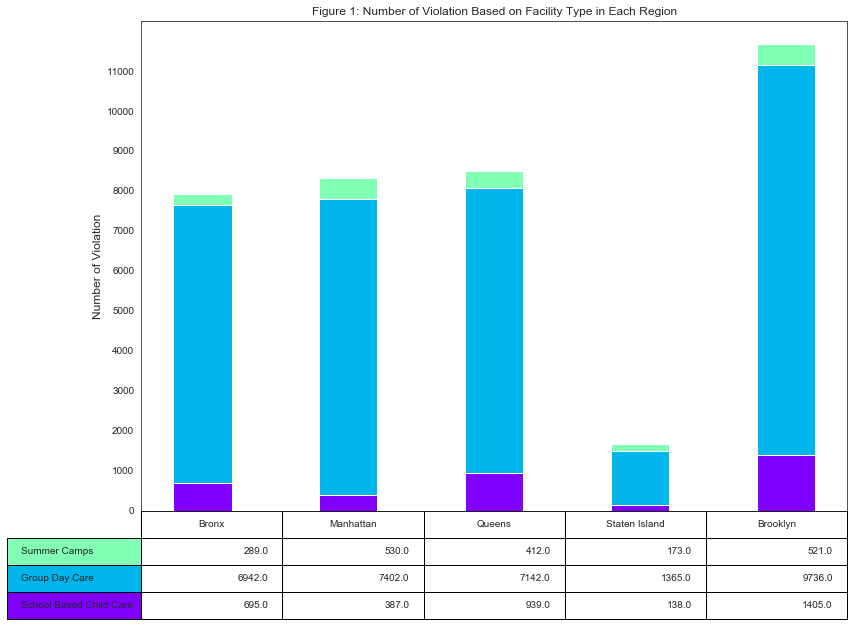

In [8]:
data_t=[[695,387,939,138,1405],[6942,7402,7142,1365,9736],[289,530,412,173,521]]
columns = ('Bronx', 'Manhattan', 'Queens', 'Staten Island', 'Brooklyn')
rows = ['Summer Camps','Group Day Care','School Based Child Care']
values = np.arange(0, 12000, 1000)
value_increment = 1000
colors = plt.cm.rainbow(np.linspace(0, 0.5, len(rows)))
n_rows = len(data_t)
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
y_offset = np.zeros(len(columns))
cell_text = []
for row in range(n_rows):
    plt.bar(index, data_t[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_t[row]
    cell_text.append(['%1.1f' % x  for x in data_t[row]])
colors = colors[::-1]
cell_text.reverse()
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.yticks( values)
plt.xticks([])
plot_sp('Figure 1: Number of Violation Based on Facility Type in Each Region',12,
        ' ',"Number of Violation")

Figure 1 demonstrates the number of violations with respect to school regions in the New York City. Brooklyn has the highest number of violation in its facilities and the least amount of violations have been observed in the region of Staten Island.

 ## Hypothesis 1

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of schools in a region and the number of the violation.

#### H1: There isn't a relation between the number of schools in a region and the number of the violation.

## Plot the number of schools in each region


In [9]:
# Create a table
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'
data_tbl = {'Regions' : ['Bronx', 'Manhattan', 'Queens', 'Staten Island', 'Brooklyn'],
        'Number of Schools' : [438, 735, 681, 139, 1219], 
        'Number of Violations' : [7926, 8319, 8493, 1676, 11662]}
df = pd.DataFrame(data_tbl)
fig = go.Figure(data=[go.Table(
  header=dict(
    values=["Regions", "Number of Schools",'Number of Violations'],
    line_color='darkslategray', fill_color=headerColor,
    align=['left'], font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[df["Regions"], df["Number of Schools"],df['Number of Violations']],
    line_color='darkslategray', fill_color=[[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align=['left','center'], font=dict(color='darkslategray', size=11)
  ))
])
fig.update_layout(
    title=go.layout.Title(
        text="Table 1: Number of school vs Number of Violation Based on Regions",
        xref="paper",
        x=0
    ))
fig.show()

In [10]:
# Pearson Correlation
r=pearson_r(df["Number of Schools"],df['Number of Violations'])
print('r:',r)
# Permutation test
perm_replicates = np.empty(10000)
for i in range(10000):
    df_permuted = np.random.permutation(df['Number of Violations'])
    perm_replicates[i] = pearson_r(df_permuted,df["Number of Schools"] )
p = np.sum(perm_replicates < 0) / len(perm_replicates)
print('p-value: ', p)

r: 0.921620192176706
p-value:  0.5128


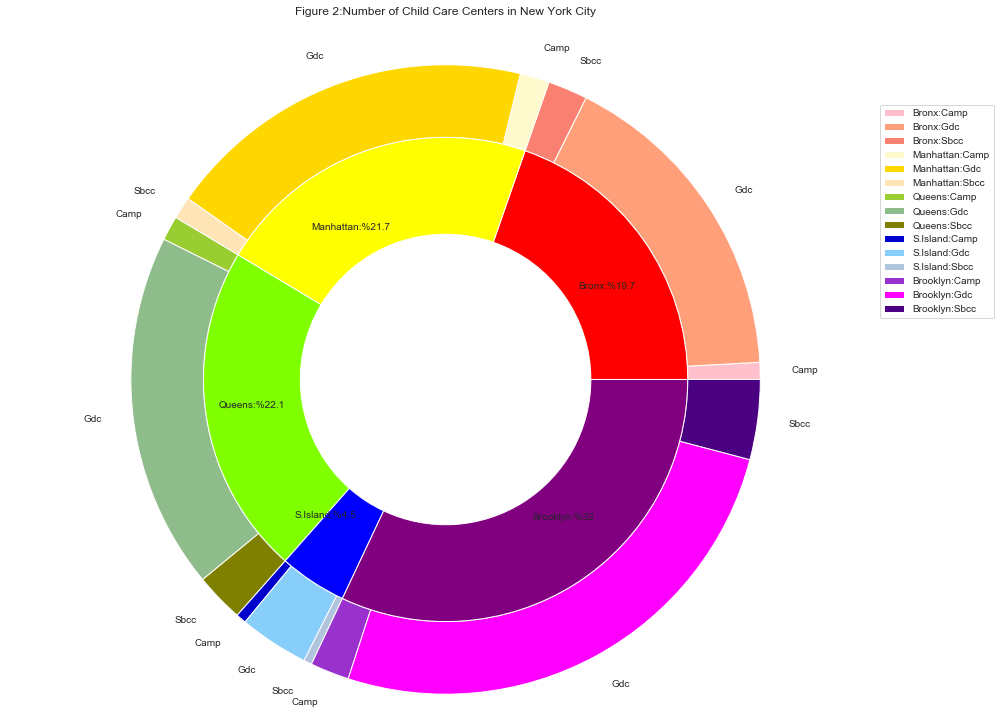

In [11]:
fig, ax = plt.subplots()
ax.axis('equal')
labels = ['Bronx:%19.7', 'Manhattan:%21.7', 'Queens:%22.1', 'S.Island:%4.5','Brooklyn:%32']
sizes = [8219, 9073, 9225, 1885,13370]
labels_facility = ['Camp','Gdc','Sbcc','Camp','Gdc','Sbcc','Camp',
                   'Gdc','Sbcc','Camp','Gdc','Sbcc','Camp','Gdc','Sbcc']
sizes_facility = [364,7003,852,630,7969,474,525,7650,1050,219,1492,174,836,10821,1713]
colors = ['#ff0000', '#ffff00', '#7fff00', '#0000ff','#800080']
colors_facility = ['#ffc0cb','#ffa07a','#fa8072','#fffacd','#ffd700','#ffe4b5','#9acd32','#8FBC8B','#808000',
                 '#0000cd','#87cefa','#b0c4de','#9932cc','#ff00ff','#4b0082' ]
labels_facility_legs=['Bronx:Camp','Bronx:Gdc','Bronx:Sbcc','Manhattan:Camp','Manhattan:Gdc','Manhattan:Sbcc',
                      'Queens:Camp','Queens:Gdc','Queens:Sbcc','S.Island:Camp','S.Island:Gdc','S.Island:Sbcc',
                      'Brooklyn:Camp','Brooklyn:Gdc','Brooklyn:Sbcc']
ax.axis('equal')
mypie, _ = ax.pie(sizes_facility, radius=1.3,labels=labels_facility, colors=colors_facility)
plt.setp( mypie, width=0.3, edgecolor='white')
mypie2, _ = ax.pie(sizes, radius=1.3-0.3, 
labels=labels, labeldistance=0.67, colors=colors)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels_facility_legs, loc=(1, 0.6))
ax.set_title("Figure 2:Number of Child Care Centers in New York City",y=1.08)
plt.tight_layout()
plt.show()

Figure 2 demonstrates the facility types in all of the school regions of the New York City.The inner chart presents the percent of the school to the corresponding school region; the outer chart represents the percent of the violations with respect different facility types in the corresponding school region. Brooklyn is the region, which has the highest number of schools in the New York City area, and Staten Island has the least number of schools. As can be seen from the Figure 1, and the Table 1, the highest number of violation has been observed in the Brooklyn region and the number of observed violations in Staten Island is the smallest.

Moreover, the r is very close to 1,we can not reject the null hypothesis. There is a relation between the number of schools and the number of violations. Another point based on the Figure 2 is that the number of group daycare is higher than other types of facilities in each region.

## Plot the number of violations in New York City 


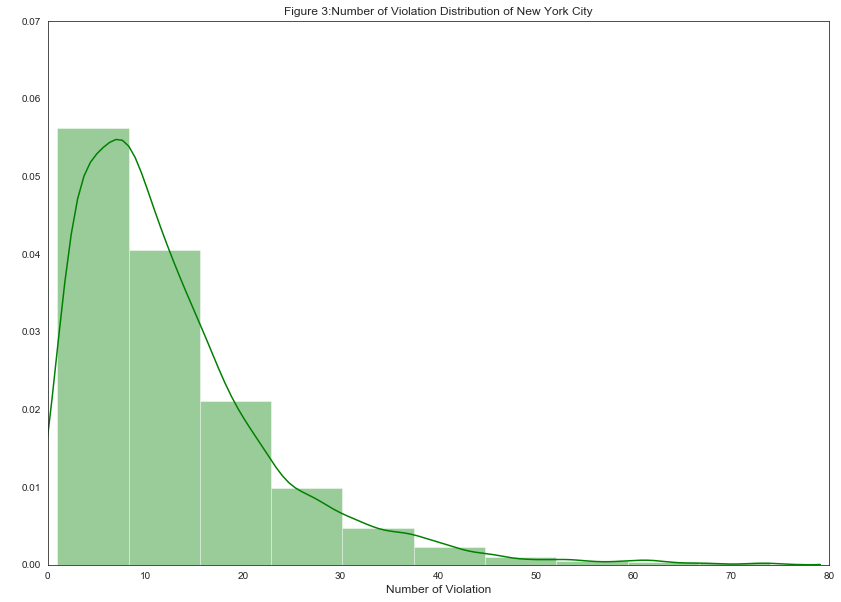

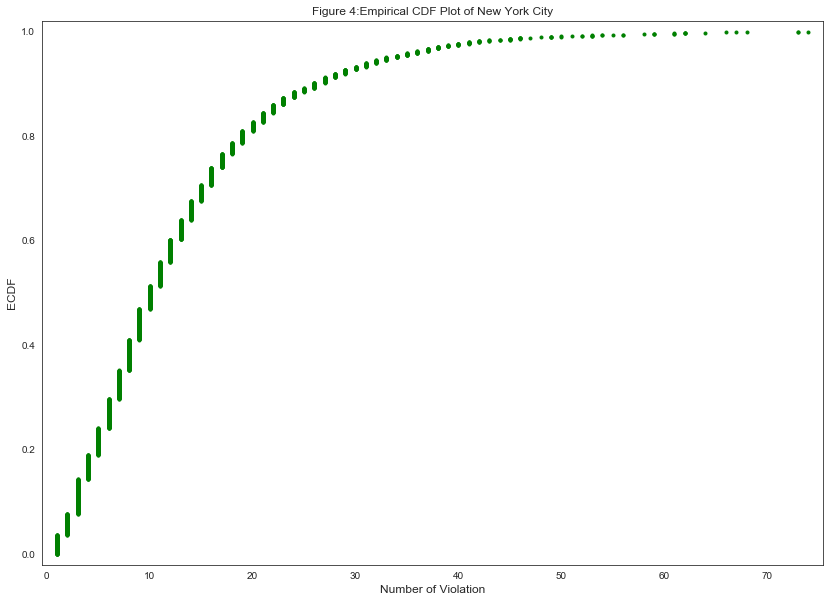

In [50]:
ny_hist=data.groupby('DayCareID')['ViolationRatePercent'].count()
ny_hist.to_csv('new_col.csv')
hist_plot=ny_hist.to_frame()
hist_plot.reset_index()
sns.distplot(hist_plot['ViolationRatePercent'],bins=10,color="green",norm_hist=True).set(xlim=(0, 80),ylim=(0,0.07))
plot_sp('Figure 3:Number of Violation Distribution of New York City',12,'Number of Violation',' ')
x=np.sort(hist_plot['ViolationRatePercent'])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker='.',linestyle='none',color='g')
plt.margins(0.02)
plot_sp('Figure 4:Empirical CDF Plot of New York City',12,'Number of Violation','ECDF')

Figure 3 and Figure 4 show that almost 20% of the schools have more than 20 violation, which correspond to the number of inspection visit in this situation.

In [13]:
no_violation=data.loc[data.ViolationRatePercent==0]
num_no_violation=len(no_violation)
num_vio_visit=data.loc[data.ViolationRatePercent!=0]
print(num_no_violation,'inspection visits turn out without any violation observation.')
print('The number of inspection visit that violation observed is ',len(num_vio_visit))
print('The maximum number of inspection visit to a facility is',ny_hist.max())
print('The worst 3 child care centers are:')
ny_data=data.groupby(['DayCareID','CenterName'])['ViolationRatePercent'].count().to_frame()
nydata=ny_data.loc[ny_data.ViolationRatePercent>70]
nydata

3698 inspection visits turn out without any violation observation.
The number of inspection visit that violation observed is  38081
The maximum number of inspection visit to a facility is 74
The worst 3 child care centers are:


ViolationRatePercent
DayCareID CenterName                                   
DC18309   THE LEARNING TREE                          74
DC20870   TENDER TOTS/137 ST LLC                     73
DC24791   SEABURY DAY CARE CENTER                    73

## Plot the number of violations in each region based on facility type

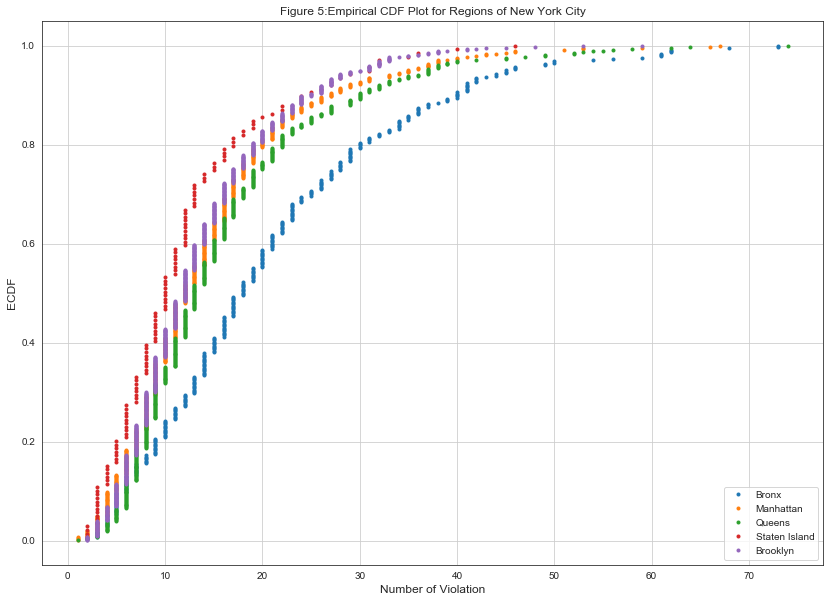

In [14]:
hist_data_br=Bronx_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot_br=hist_data_br.to_frame()
hist_plot_br.reset_index()
hist_data_m=Manhattan_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot_m=hist_data_m.to_frame()
hist_plot_m.reset_index()
hist_data_q=Queens_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot_q=hist_data_q.to_frame()
hist_plot_q.reset_index()
hist_data_s=StatenIsland_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot_s=hist_data_s.to_frame()
hist_plot_s.reset_index()
hist_data_b=Brooklyn_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot_b=hist_data_b.to_frame()
hist_plot_b.reset_index()
def ecdf(a,b):
    x=np.sort(a[b])
    y=np.arange(1,len(x)+1)/len(x)
    return x, y
x_brx,y_brx=ecdf(hist_plot_br,'ViolationRatePercent')
x_man,y_man=ecdf(hist_plot_m,'ViolationRatePercent')
x_que,y_que=ecdf(hist_plot_q,'ViolationRatePercent')
x_sti,y_sti=ecdf(hist_plot_s,'ViolationRatePercent')
x_boo,y_boo=ecdf(hist_plot_b,'ViolationRatePercent')
_=plt.plot(x_brx,y_brx,marker='.',linestyle='none')
_=plt.plot(x_man,y_man,marker='.',linestyle='none')
_=plt.plot(x_que,y_que,marker='.',linestyle='none')
_=plt.plot(x_sti,y_sti,marker='.',linestyle='none')
_=plt.plot(x_boo,y_boo,marker='.',linestyle='none')
plt.grid()
plt.legend(('Bronx','Manhattan','Queens','Staten Island','Brooklyn'),loc='lower right')
plot_sp('Figure 5:Empirical CDF Plot for Regions of New York City',12,'Number of Violation','ECDF')

Based on Figure 5, The highest violation density belongs to Bronx. For example, 80% of schools in Manhattan and Brooklyn have 20 violations in three years. In Staten Island it is less than 20 violations and in Queens it is a little bit more than 20. However in Bronx %80 of schools has 30 violations in three years.

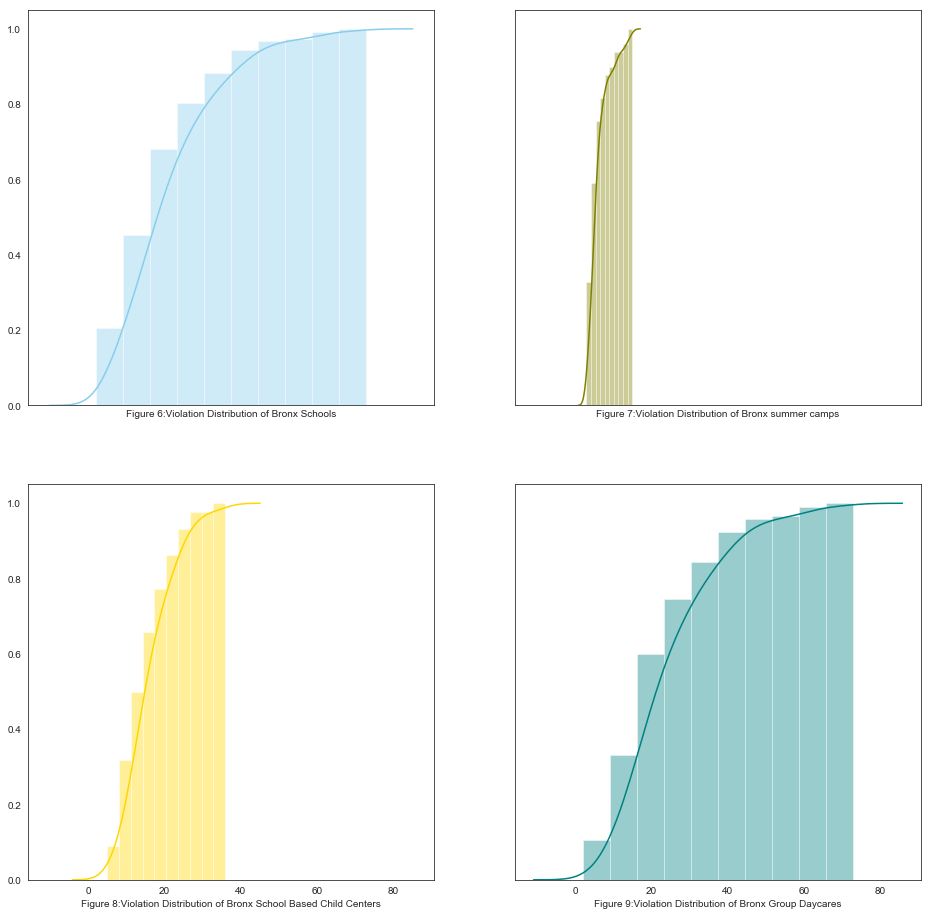

In [15]:
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True,sharey=True)
sns.distplot(hist_plot_br['ViolationRatePercent'],bins=10,color="skyblue", ax=axes[0, 0],
             axlabel='Figure 6:Violation Distribution of Bronx Schools',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data1=Bronx_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot1=hist_data1.to_frame()
hist_plot1.reset_index()
sns.distplot(hist_plot1['ViolationRatePercent'],bins=10,color="olive", ax=axes[0, 1],
             axlabel='Figure 7:Violation Distribution of Bronx summer camps',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data2=Bronx_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot2=hist_data2.to_frame()
hist_plot2.reset_index()
sns.distplot(hist_plot2['ViolationRatePercent'],bins=10,color="gold", ax=axes[1, 0],
             axlabel='Figure 8:Violation Distribution of Bronx School Based Child Centers',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data3=Bronx_gdc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot3=hist_data3.to_frame()
hist_plot3.reset_index()
sns.distplot(hist_plot3['ViolationRatePercent'],bins=10,color="teal", ax=axes[1, 1],
             axlabel='Figure 9:Violation Distribution of Bronx Group Daycares',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.show()

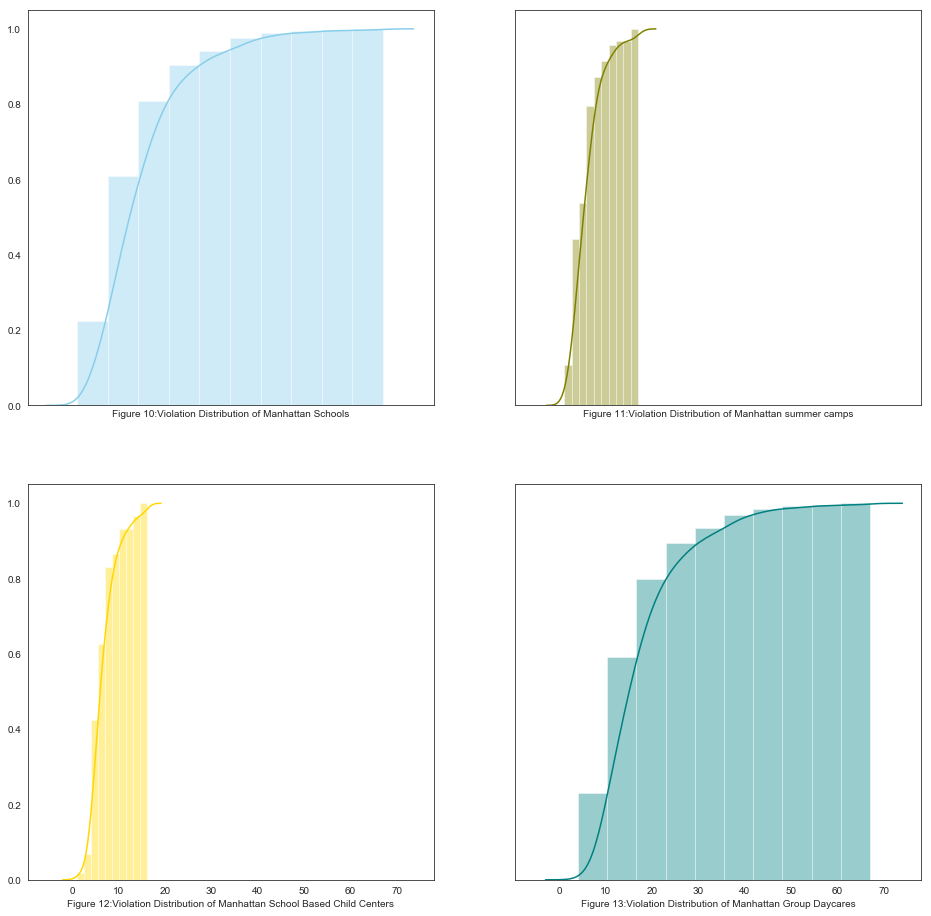

In [16]:
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True,sharey=True)
sns.distplot(hist_plot_m['ViolationRatePercent'],bins=10,color="skyblue", ax=axes[0, 0],
             axlabel='Figure 10:Violation Distribution of Manhattan Schools',
             hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data1=Manhattan_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot1=hist_data1.to_frame()
hist_plot1.reset_index()
sns.distplot(hist_plot1['ViolationRatePercent'],bins=10,color="olive", ax=axes[0, 1],
             axlabel='Figure 11:Violation Distribution of Manhattan summer camps',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data2=Manhattan_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot2=hist_data2.to_frame()
hist_plot2.reset_index()
sns.distplot(hist_plot2['ViolationRatePercent'],bins=10,color="gold", ax=axes[1, 0],
             axlabel='Figure 12:Violation Distribution of Manhattan School Based Child Centers',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data3=Manhattan_gdc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot3=hist_data3.to_frame()
hist_plot3.reset_index()
sns.distplot(hist_plot3['ViolationRatePercent'],bins=10,color="teal", ax=axes[1, 1],
             axlabel='Figure 13:Violation Distribution of Manhattan Group Daycares',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.show()

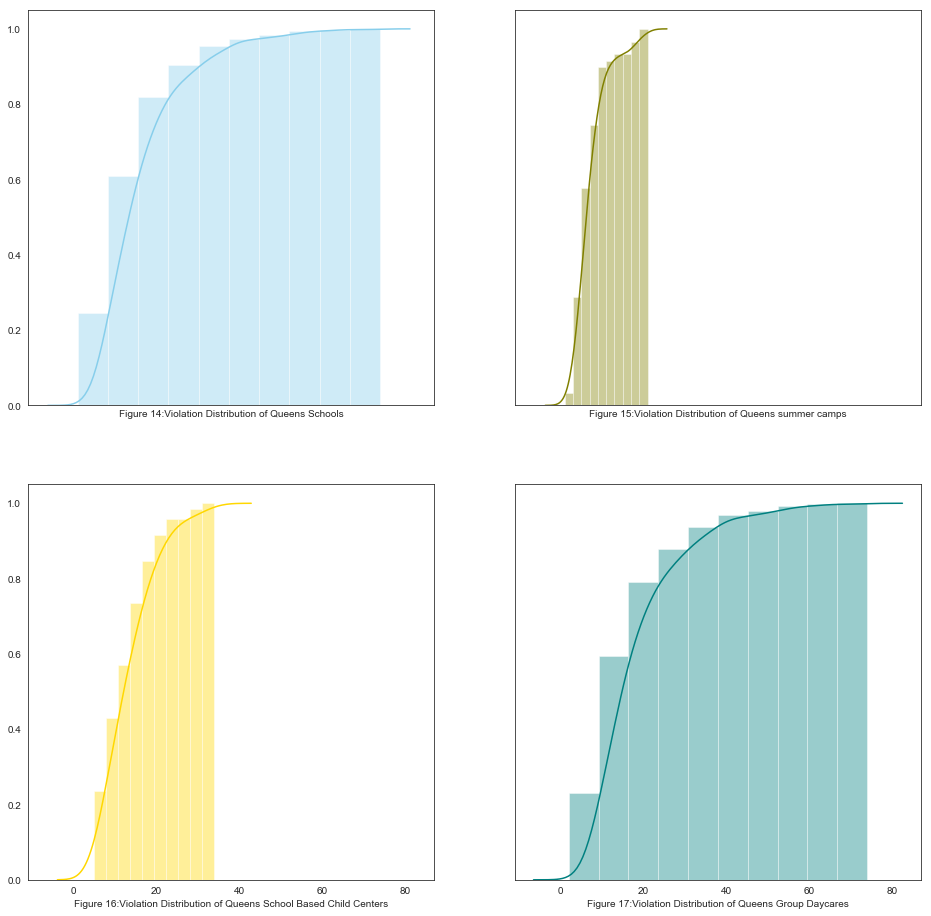

In [17]:
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True,sharey=True)
sns.distplot(hist_plot_q['ViolationRatePercent'],bins=10,color="skyblue", ax=axes[0, 0],
             axlabel='Figure 14:Violation Distribution of Queens Schools',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data1=Queens_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot1=hist_data1.to_frame()
hist_plot1.reset_index()
sns.distplot(hist_plot1['ViolationRatePercent'],bins=10,color="olive", ax=axes[0, 1],
             axlabel='Figure 15:Violation Distribution of Queens summer camps',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data2=Queens_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot2=hist_data2.to_frame()
hist_plot2.reset_index()
sns.distplot(hist_plot2['ViolationRatePercent'],bins=10,color="gold", ax=axes[1, 0],
             axlabel='Figure 16:Violation Distribution of Queens School Based Child Centers',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data3=Queens_gdc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot3=hist_data3.to_frame()
hist_plot3.reset_index()
sns.distplot(hist_plot3['ViolationRatePercent'],bins=10,color="teal", ax=axes[1, 1],
             axlabel='Figure 17:Violation Distribution of Queens Group Daycares',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.show()

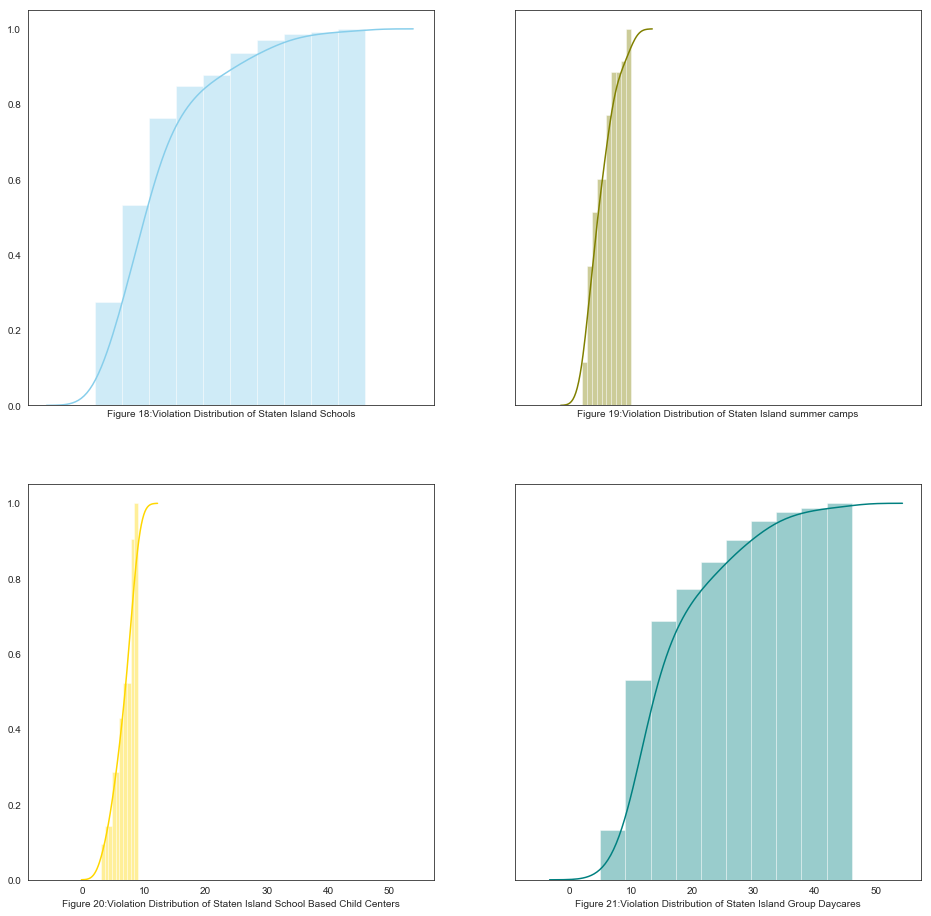

In [18]:
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True,sharey=True)
sns.distplot(hist_plot_s['ViolationRatePercent'],bins=10,color="skyblue", ax=axes[0, 0],
             axlabel='Figure 18:Violation Distribution of Staten Island Schools',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data1=StatenIsland_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot1=hist_data1.to_frame()
hist_plot1.reset_index()
sns.distplot(hist_plot1['ViolationRatePercent'],bins=10,color="olive", ax=axes[0, 1],
             axlabel='Figure 19:Violation Distribution of Staten Island summer camps',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data2=StatenIsland_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot2=hist_data2.to_frame()
hist_plot2.reset_index()
sns.distplot(hist_plot2['ViolationRatePercent'],bins=10,color="gold", ax=axes[1, 0],
             axlabel='Figure 20:Violation Distribution of Staten Island School Based Child Centers',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data3=StatenIsland_gdc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot3=hist_data3.to_frame()
hist_plot3.reset_index()
sns.distplot(hist_plot3['ViolationRatePercent'],bins=10,color="teal", ax=axes[1, 1],
             axlabel='Figure 21:Violation Distribution of Staten Island Group Daycares',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.show()



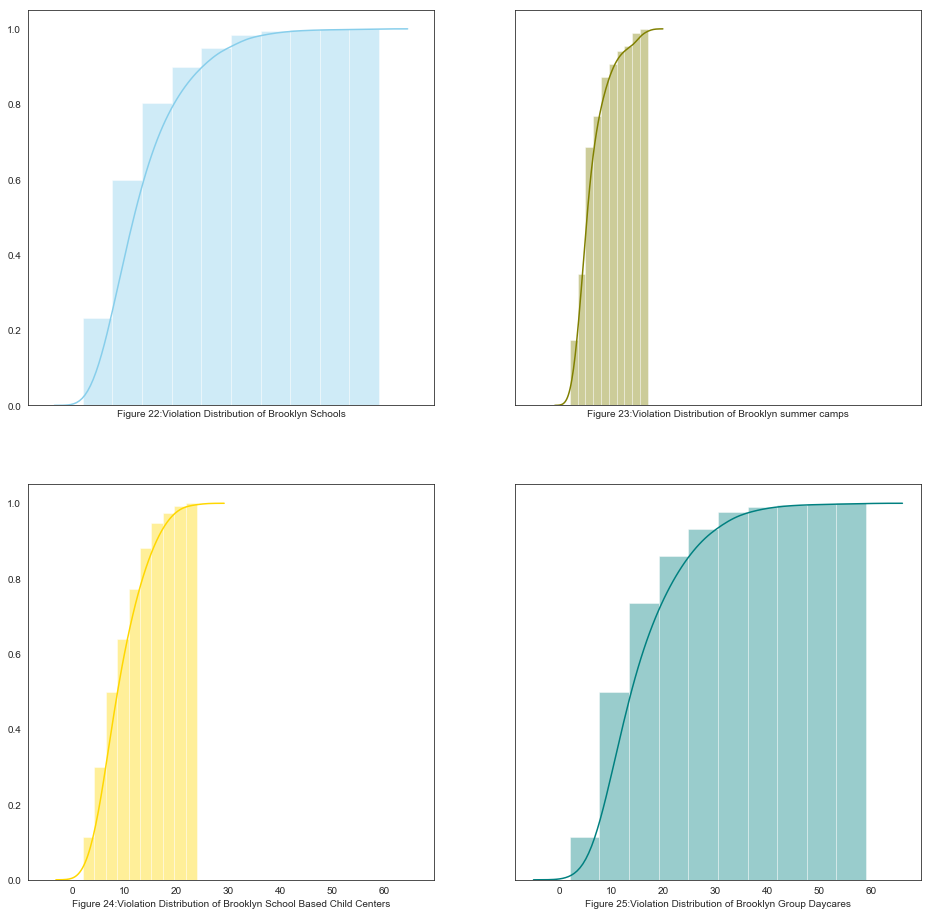

In [19]:
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True,sharey=True)
sns.distplot(hist_plot_b['ViolationRatePercent'],bins=10,color="skyblue", ax=axes[0, 0],
             axlabel='Figure 22:Violation Distribution of Brooklyn Schools',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data1=Brooklyn_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot1=hist_data1.to_frame()
hist_plot1.reset_index()
sns.distplot(hist_plot1['ViolationRatePercent'],bins=10,color="olive", ax=axes[0, 1],
             axlabel='Figure 23:Violation Distribution of Brooklyn summer camps',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data2=Brooklyn_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot2=hist_data2.to_frame()
hist_plot2.reset_index()
sns.distplot(hist_plot2['ViolationRatePercent'],bins=10,color="gold", ax=axes[1, 0],
             axlabel='Figure 24:Violation Distribution of Brooklyn School Based Child Centers',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
hist_data3=Brooklyn_gdc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values()
hist_plot3=hist_data3.to_frame()
hist_plot3.reset_index()
sns.distplot(hist_plot3['ViolationRatePercent'],bins=10,color="teal", ax=axes[1, 1],
             axlabel='Figure 25:Violation Distribution of Brooklyn Group Daycares',
            hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.show()


# What kind of factors affect the safety level of childcare facilities?

## 1. The Capacity of the schools

## Hypothesis 2

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of students and the number of the violation.

#### H1: There isn't a relation between the number of students and the number of the violation.

## Plot the number of student vs. the number of violations

Below, figure 26 shows that the relation between the number of students and the number of violations in New York.

In [20]:
dfs=data.reset_index()
dff=dfs.groupby(['DayCareID','FacilityType','Borough','ViolationStatus','AgeRange','ZipCode'],as_index=False).agg({
                                                                                        "MaximumCapacity":'mean',
                                                                                        'ViolationRatePercent':'count',
                                                                                        'TotalEducationalWorkers':'mean',
                                                                                        'How_long':'mean'})
df_f=dff.sort_values('MaximumCapacity')
df_g=df_f[:-8]
df_gi=df_f[:-30]

p: 0.6847612527837588
r: 0.0036548221215724473
accept null hypothesis


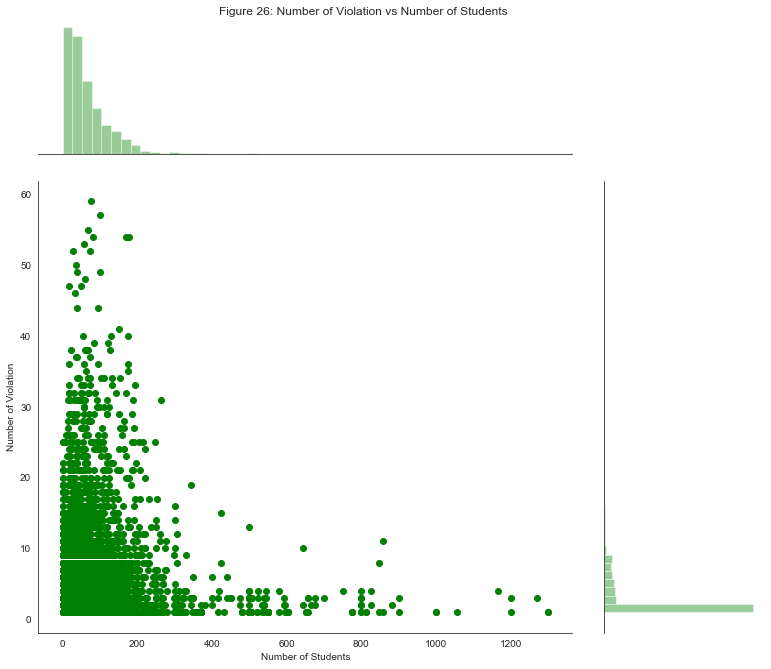

In [21]:
# Correlation
(correlation, p) = stats.pearsonr(df_g.MaximumCapacity, df_g.ViolationRatePercent)
print('p:',float(p))
print('r:',float(correlation))
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
g=sns.jointplot(x='MaximumCapacity', y='ViolationRatePercent', data=df_g,height=5, ratio=3, color="g" )
g.fig.suptitle('Figure 26: Number of Violation vs Number of Students')
g.set_axis_labels("Number of Students",'Number of Violation')
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()

Figure 26 shows that there is a very weak(r is very small) negative correlation between the number of students and the number of the violation, we can not reject the null hypothesis(the p-value is bigger than 0.05). When the number of students is higher, the number of violation is lower. 

## 2. The number of educated staff

## Hypothesis 3

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of educated workers and the number of the violation.

#### H1: There isn't a relation between the number of educated workers and the number of the violation.

## Plot the number of educated workers vs. the number of violations

Below, figure 27 shows that the relation between the number of educated workers and the number of violations in New York. Educated workers correspond to a current number of educational staff in the program, including teachers, assistant teachers, teacher directors, and education directors.

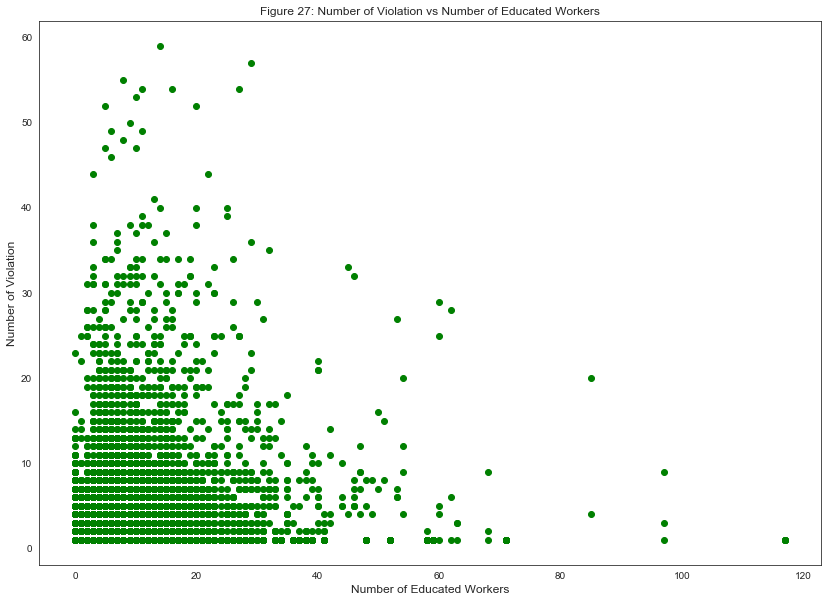

p: 1.582906983006588e-13
r: 0.06634460201734342
reject null hypothesis


In [22]:
plt.scatter(y=dff.ViolationRatePercent,x=dff.TotalEducationalWorkers,color='g')
plot_sp('Figure 27: Number of Violation vs Number of Educated Workers',12,
        "Number of Educated Workers",'Number of Violation')
# Correlation
(correlation, p) = stats.pearsonr(dff.TotalEducationalWorkers, dff.ViolationRatePercent)
print('p:',float(p))
print('r:',float(correlation))
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

According to Figure 27, there isn't a relation between the number of educated staff of a facility and the number of the violation. The p-value is very low,so we can reject the null hypothesis. 

## 3. Operated time of schools

## Hypothesis 3

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of years that the facility operated and the number of the violation.

#### H1: There isn't a relation between the number of years that the facility operated and the number of the violation.

## Plot the number of years that the facility operated vs. the number of violations

The number of years that the facilities operated are calculated thorough the permit date and the permit expiration date. The difference between these two dates is sorted to the year ranges.


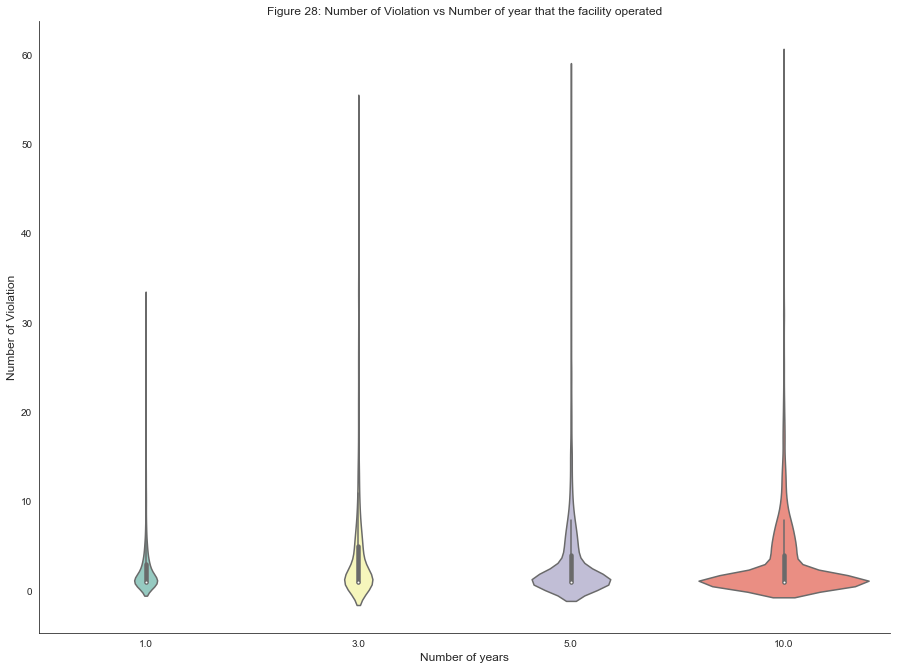

In [23]:
ax=sns.catplot(x="How_long", y="ViolationRatePercent",
            kind="violin", data=dff,palette="Set3",scale="count", inner="box")
plot_sp('Figure 28: Number of Violation vs Number of year that the facility operated',12, "Number of years",
        'Number of Violation')

As seen in Figure 28, Violin plot showing the distribution of the total years that the facilities operated based on the number of violation. The median of the number of violation for each grup is aproximately close to each other(smaller than 10). Most of the schools are operated 10 year and more than 10 year. 1 year period schools are camps and their inspection time is limited.   

## 4. Facility Types

## Hypothesis 4

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the type of the facilities and the number of the violation.

#### H1: There isn't a relationship between the type of the facilities and the number of the violation.

## Plot the number of violations based on facility type

There are three types of facilities: group daycare(gdc), camps, school base childcare(sbcc).


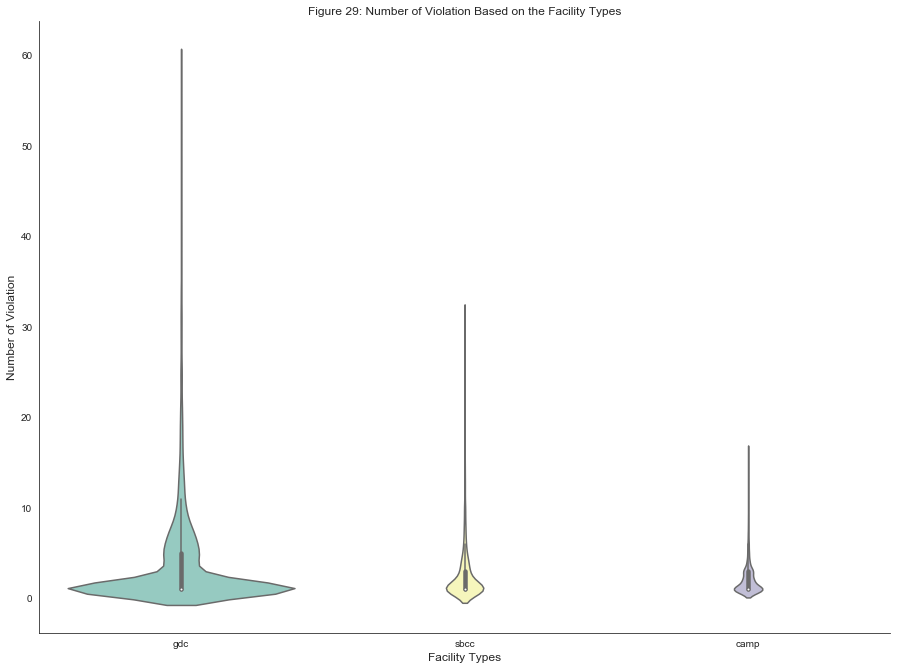

In [24]:
ax=sns.catplot(x="FacilityType", y="ViolationRatePercent",
               kind="violin", data=dff,palette="Set3",scale="count", inner="box")
plot_sp('Figure 29: Number of Violation Based on the Facility Types',12,"Facility Types",'Number of Violation')

Figure 29 shows that there is a relation between the facility types and the number of violations. According to the plot, the number of violation is least in summer camps. However, summer camps are short term facilities. They operate for three months. It could affect the amount of visit for inspection. (number of violation=number of inspection) The higher violation numbers are cumulative in group daycares. The number of students and the number of educated workers might have an impact on this result.

## Counting with Plots

Figure 30, and 31  show the status of violations, and violation categories.

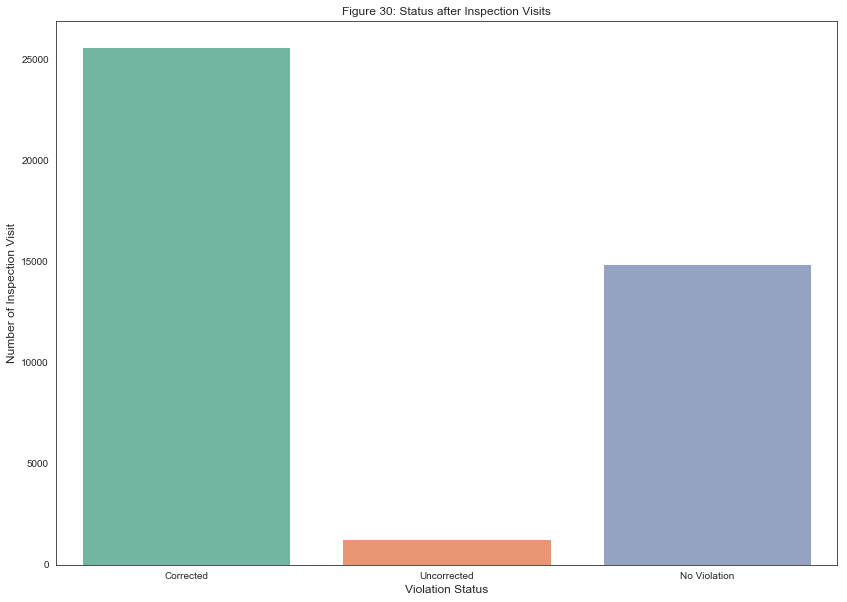

Number of uncorrected violation status is 1262


In [25]:
ax=sns.countplot(x="ViolationStatus", data=data,palette="Set2")
ax.set_xticklabels(['Corrected','Uncorrected','No Violation'])
plot_sp('Figure 30: Status after Inspection Visits',12,'Violation Status','Number of Inspection Visit')
nop=data[data.ViolationStatus=='OPEN']
print('Number of uncorrected violation status is',len(nop))

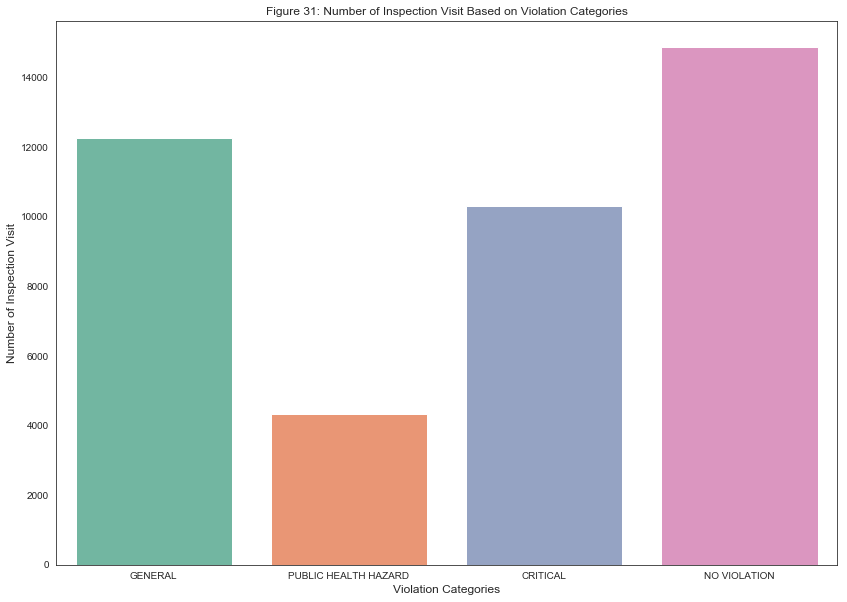

Number of general violation is 12261
Number of public health hazard violation is 4319
Number of critical violation is 10318


In [26]:
ax=sns.countplot(x="ViolationCategory", data=data,palette="Set2")
ax.set_xticklabels(['GENERAL','PUBLIC HEALTH HAZARD','CRITICAL',"NO VIOLATION"])
plot_sp('Figure 31: Number of Inspection Visit Based on Violation Categories',12,'Violation Categories','Number of Inspection Visit')
gen=data[data.ViolationCategory=='GENERAL']
crit=data[data.ViolationCategory=='CRITICAL']
phh=data[data.ViolationCategory=='PUBLIC HEALTH HAZARD']
print('Number of general violation is',len(gen)) 
print('Number of public health hazard violation is',len(phh))
print('Number of critical violation is',len(crit),)

There are more than 10000 critical violations, which contains problems such as pest problem, allowing staff to perform when they are not healthy, outdoor play area without fencing,diaper changing area without proper sanitary,fails to properly clean and sanitize plate and dishware.

There are approximately 5000 public health hazard violations,which contains problems such as failed to stuff's criminal background checks, stuffs failed to wash hands after using lavatory, unsafe sleeep environment for infants, operating without a permit.

There are more than 10000 general violations, which contains problems such as improper storage of garbage, fail to obtain written parental permission for travelling, no isolation area for sick children, smoking observed in outdoor area,fails to provide adequate ventilation, fail to provide clean sheets.

## Plot the Violation Status based on Age Range of Kids

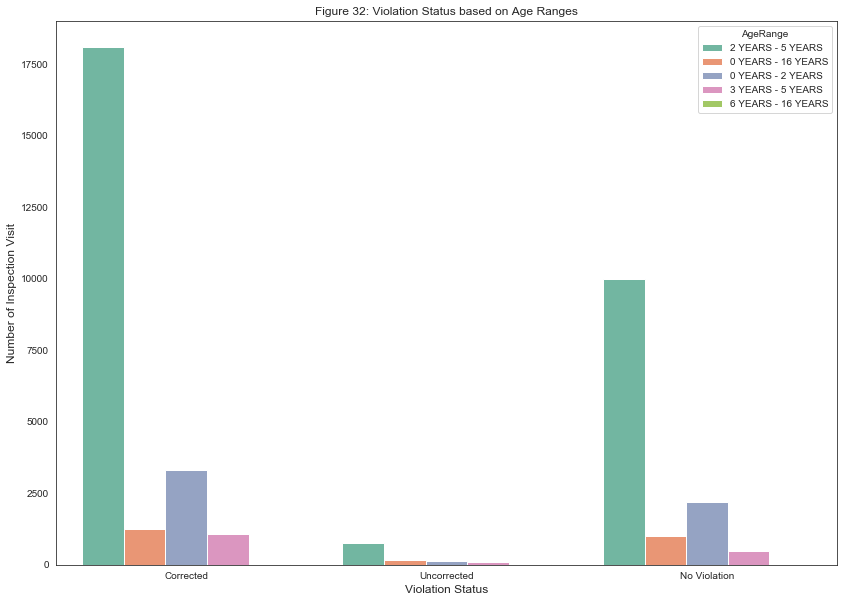

In [27]:
df_=data.loc[data.AgeRange != '0']
ax=sns.countplot(x="ViolationStatus", data=df_,palette="Set2",hue='AgeRange')
ax.set_xticklabels(['Corrected','Uncorrected','No Violation'])
plot_sp('Figure 32: Violation Status based on Age Ranges',12,'Violation Status','Number of Inspection Visit')



## Plot the number of students and the number of educated workers based on facility type


In [28]:
data_new=data.reset_index()
data_new.set_index('FacilityType',inplace=True)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



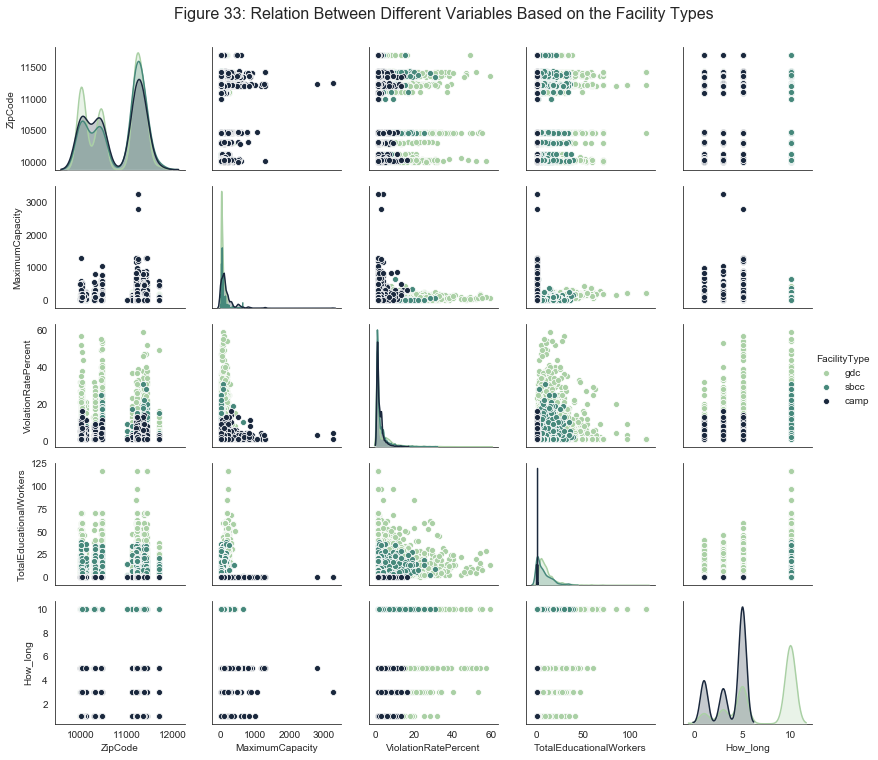

In [29]:
g = sns.pairplot(dff,hue='FacilityType',palette="ch:r=-.5,l=.75",diag_kind="kde")
g.fig.suptitle('Figure 33: Relation Between Different Variables Based on the Facility Types',y=1.04,fontsize=16)
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()    

In [30]:
map_yelp=pd.read_csv('map_yelp.csv')
mapyelp=map_yelp.drop_duplicates()

## Plot the text data

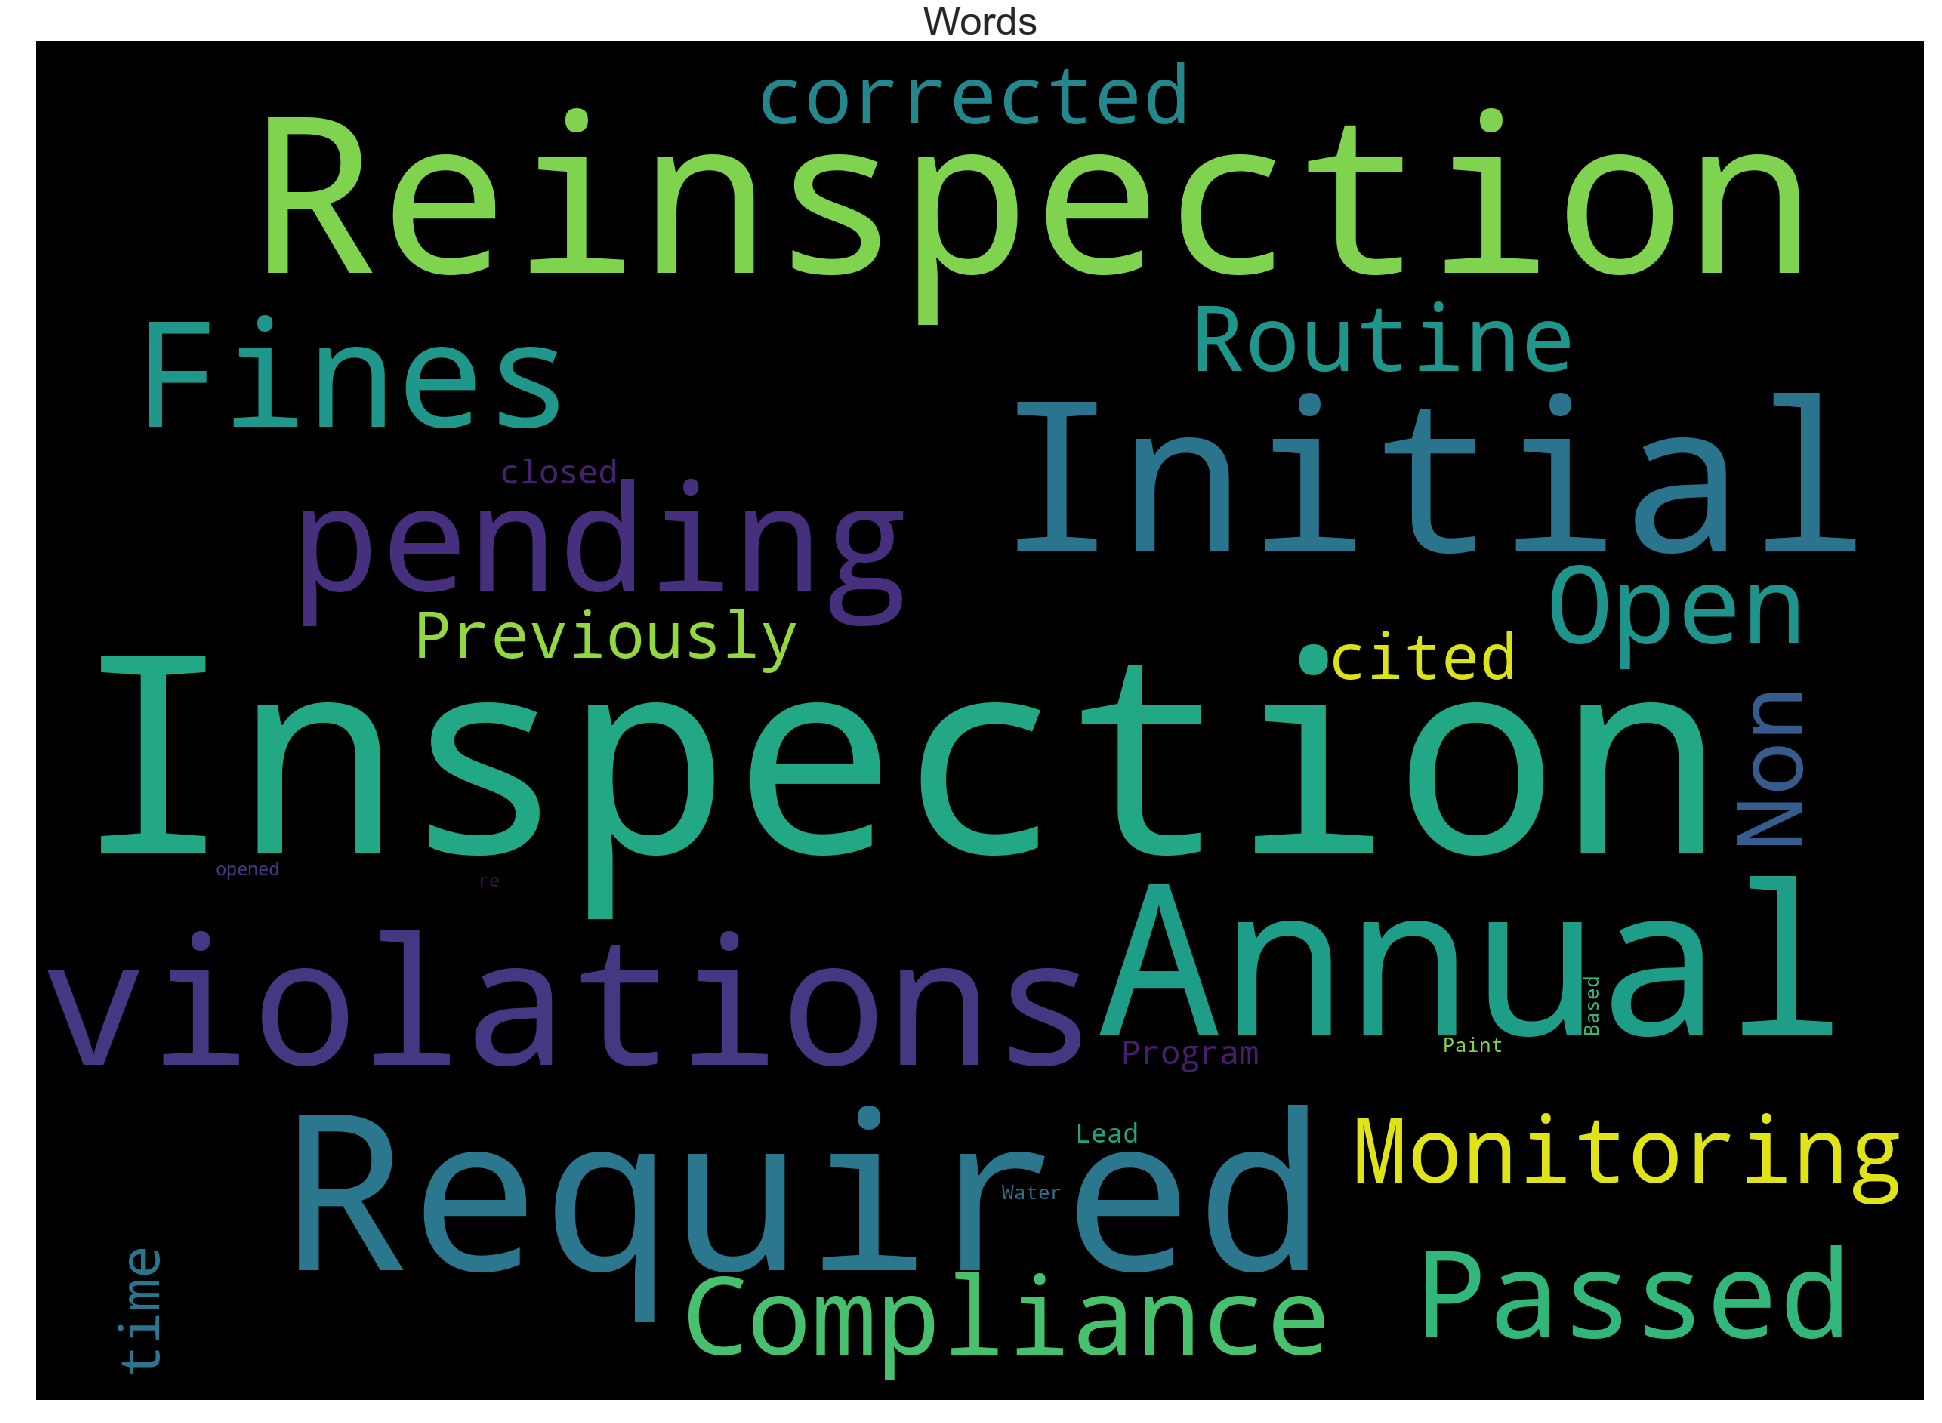

In [57]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
subset = data[['InspectionSummaryResult','RegulationSummary']]
text_1 = subset.InspectionSummaryResult.values
cloud_Ins = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text_1))
plt.axis('off')
plt.title("Words",fontsize=40)
plt.imshow(cloud_Ins)


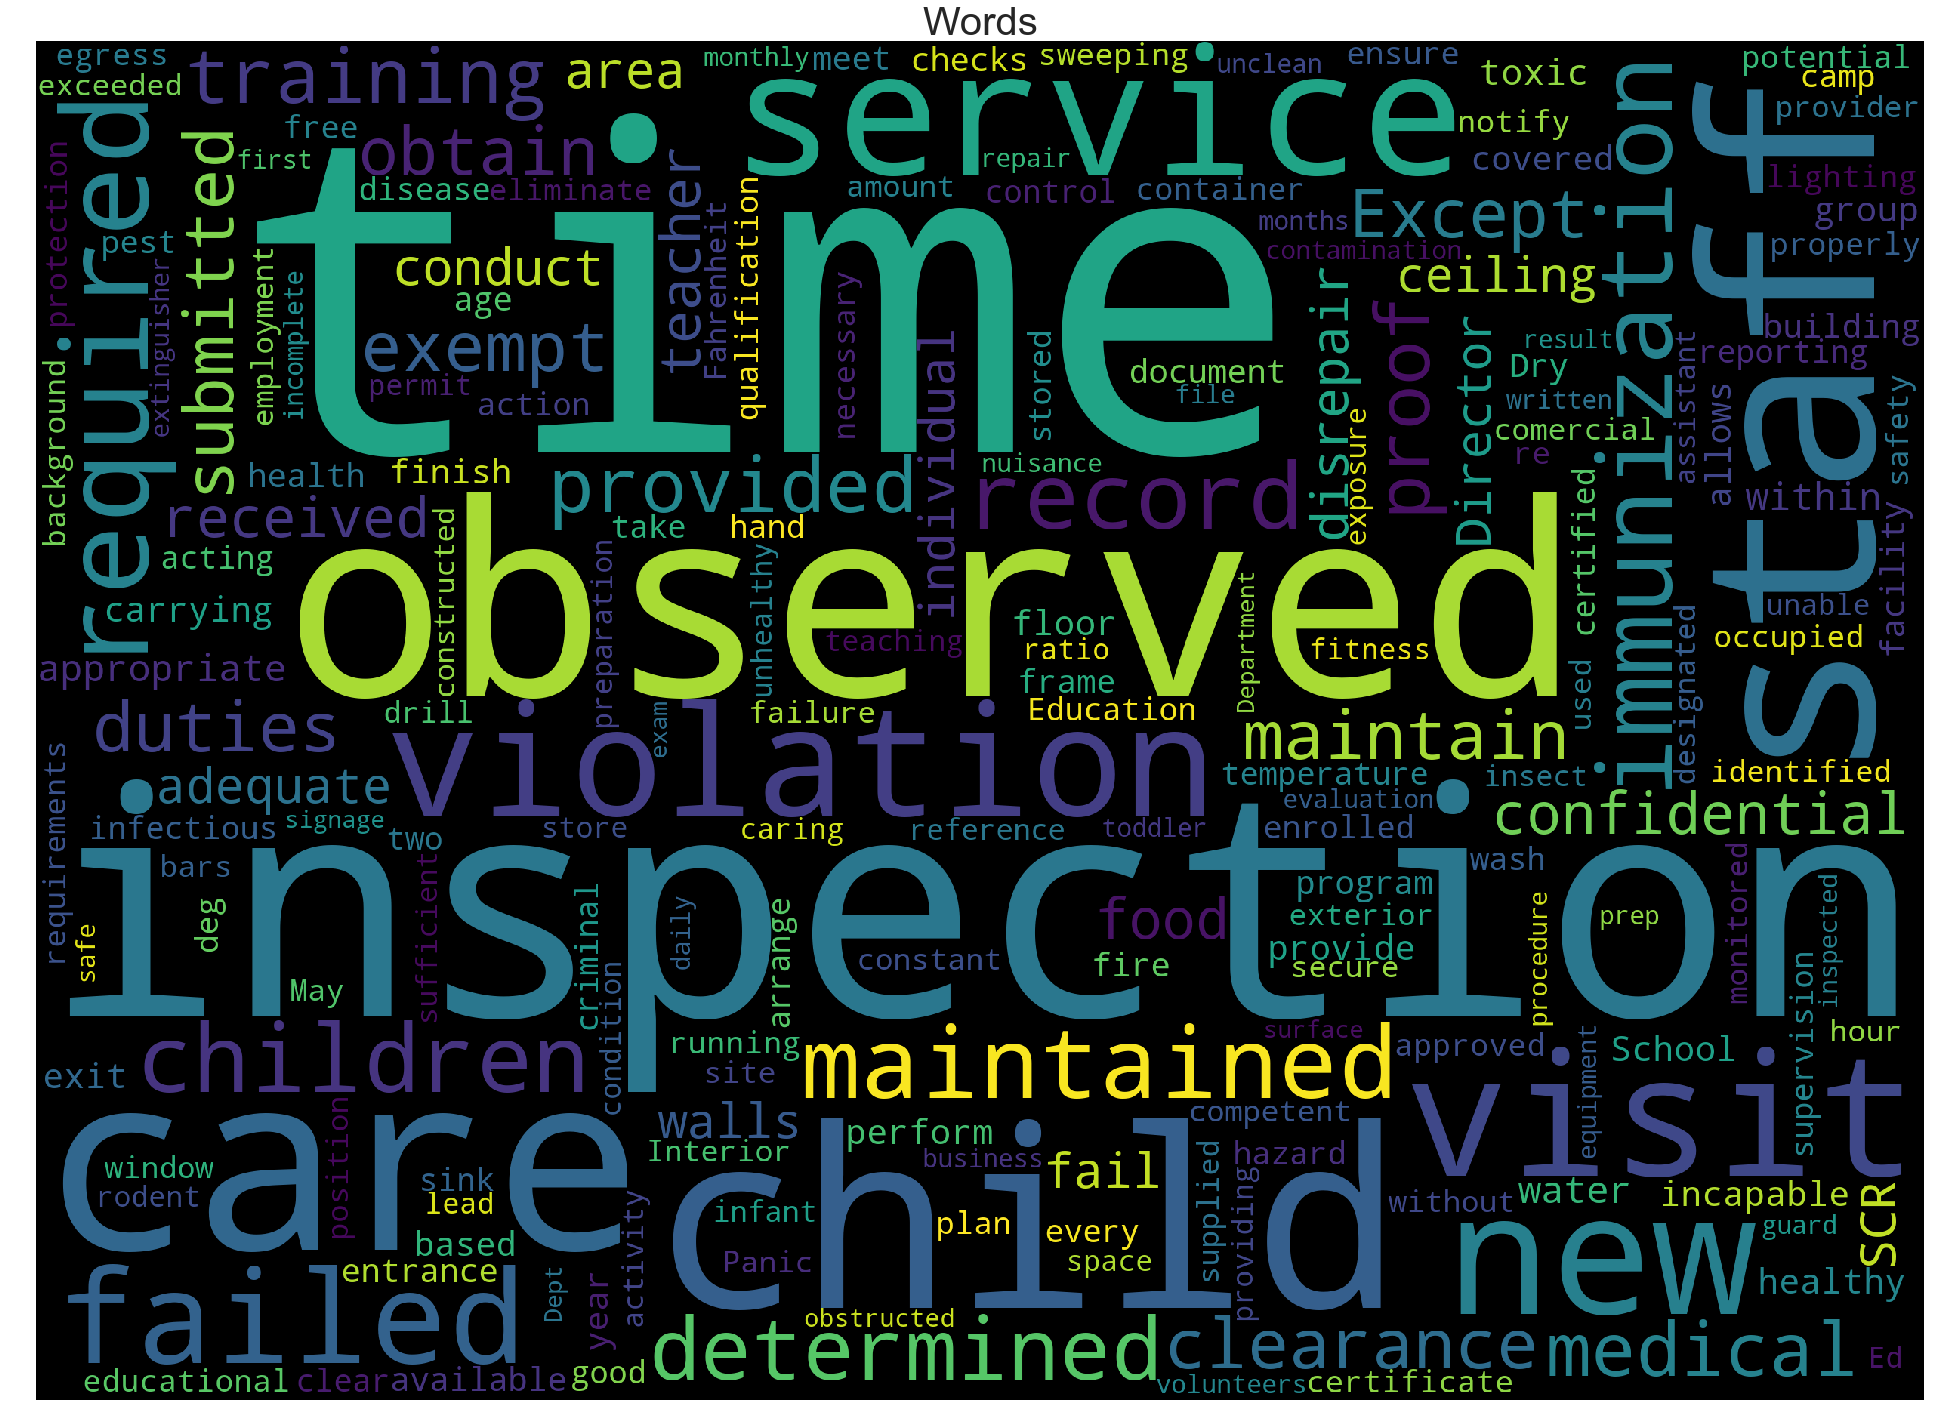

In [58]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
subset = data[['InspectionSummaryResult','RegulationSummary']]
text_2 = subset.RegulationSummary.values
cloud_Reg = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text_2))
plt.axis('off')
plt.title("Words",fontsize=40)
plt.imshow(cloud_Reg)

# Is there a relationship between the inspection report findings and the ratings of the parents?

## 4. Ratings

### Hypothesis 5

The null and alternative hypothesis are stated below:

H0: There is a relation between the number of violation and the ratings at Yelp.

H1: There isn't a relation between the number of violation and the ratings at Yelp.


## Plot the number of violations based vs ratings


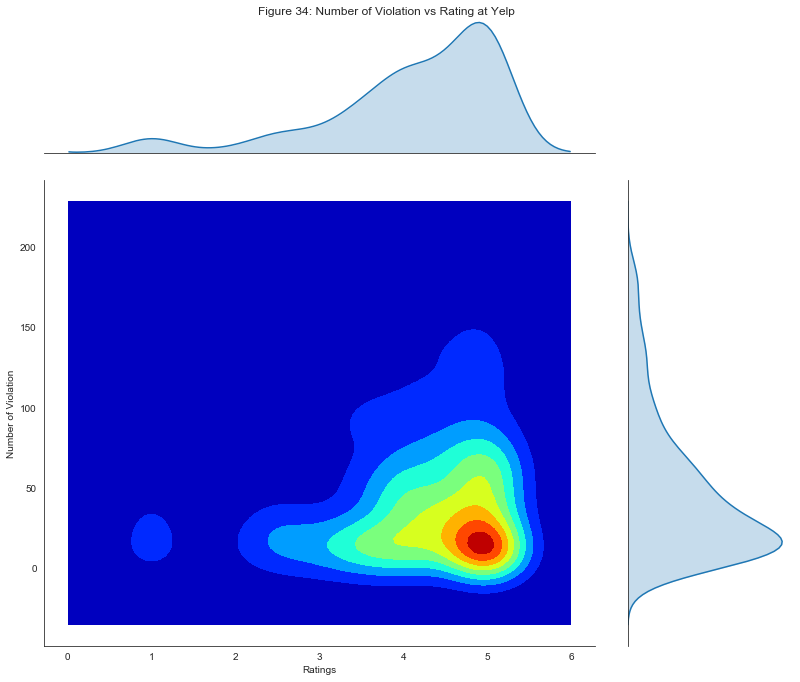

p: 0.004387520433498654
r: 0.13793547052265467
reject null hypothesis


In [31]:
yelp=mapyelp.groupby(['DayCareID','Borough','CenterName','longitude','latitude'],as_index=False).agg({'ViolationRatePercent':'count','rating':'mean','ZipCode':'mean'})
yelp_1=yelp.sort_values('ViolationRatePercent')
yelp_2=yelp_1[:-30]
g=sns.jointplot(x='rating', y='ViolationRatePercent', data=yelp_2,kind="kde",cmap=cm.jet,
              n_levels=10,ratio=3 )
g.fig.suptitle('Figure 34: Number of Violation vs Rating at Yelp')
g.set_axis_labels("Ratings",'Number of Violation')
fig = plt.gcf()
fig.set_size_inches( 12, 10)
plt.show()
# Correlation
(correlation, p) = stats.pearsonr(yelp_2.rating, yelp_2.ViolationRatePercent)
print('p:',float(p))
print('r:',float(correlation))
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

The p-value is very low, so we can reject the null hypothesis. Also, we can interpret this plot in away that parents can not detect a childcare center based on safety and hygiene.

# Does location/neighborhood affect the safety level of childcare centers?

## 5. Location

## Mapping the Data

In [32]:
mark=pd.read_csv('us-zip-code-latitude-and-longitude (1).csv')
mark['ZipCode']=mark['Zip'].astype(str)
numSchool= data.groupby('ZipCode')['DayCareID'].unique()
num_School=numSchool.to_frame()
num_School.columns
num_School['number_of_school']=[len(row) for row in num_School['DayCareID']]

In [33]:
import folium 
from folium.plugins import MarkerCluster
m = folium.Map(location=[40.767937,-73.982155 ],zoom_start=9)
mc = MarkerCluster().add_to(m)
yelp_1['Result'] = yelp_1['CenterName']+":rate is "+yelp_1['rating'].apply(str)
for each in yelp_1.iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],
                      popup=each[1]['Borough'] + ": " + each[1]['Result']).add_to(mc)
yelp_2=yelp_1.loc[yelp_1.rating == 1]
print(yelp_2['Result'].reset_index())

    index                                             Result
0     425    BRIGHT HORIZONS AT EAST 46TH STREET:rate is 1.0
1     426    BRIGHT HORIZONS AT EAST 46TH STREET:rate is 1.0
2     228  THE PARK SLOPE DAY CAMP AT HOLY NAME SCHOOL:ra...
3     376                  EINSTEIN DAYCARE INC.:rate is 1.0
4     418           One of a Kind Child Care LLC:rate is 1.0
5     247                    PARK SLOPE DAY CAMP:rate is 1.0
6     111                     SANTA MARIA SCHOOL:rate is 1.0
7     314                THE PARK SLOPE DAY CAMP:rate is 1.0
8     345          TENDER TOTS CHILD CARE CENTER:rate is 1.0
9     380                          UNIKIDS, INC.:rate is 1.0
10    264                THE PARK SLOPE DAY CAMP:rate is 1.0
11    346          TENDER TOTS CHILD CARE CENTER:rate is 1.0
12    368               SUNSHINE LEARNING CENTER:rate is 1.0
13    118  JEWISH COMMUNITY CENTER OF STATEN ISLAND, INCO...
14    377                   EINSTEIN DAYCARE INC:rate is 1.0
15    308               

This map shows the childcare centers with their location and rating based on yelp data set.

In [60]:
m.save('m.html')


In [70]:
from IPython.core.display import HTML
HTML(m._repr_html_())

In [36]:
num_S=num_School.reset_index()

In [37]:
district_geo = r'nyc_zip_code_tabulation_areas_polygons.geojson'
nm_schl=num_S[['ZipCode','number_of_school']]
nm_schl['ZipCode'] = nm_schl['ZipCode'].astype('int').astype('str')
map1=folium.Map(location=[40.767937,-73.982155 ],zoom_start=15,tiles='cartodbpositron')
folium.Choropleth(geo_data = district_geo,name='choropleth',data = nm_schl, columns = ['ZipCode','number_of_school'],
    key_on = 'feature.properties.postalcode',fill_color = 'YlGn', fill_opacity = 0.7,highlight=True, 
    legend_name = 'Number of school per zip code').add_to(map1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Map shows that the proportion of the number of school per zipcode.

In [73]:
map1.save('map_1.html')
HTML(map1._repr_html_())

In [40]:
district_geo = r'nyc_zip_code_tabulation_areas_polygons.geojson'
nm_vio=dff[['ZipCode','ViolationRatePercent']]
nm_vio['ZipCode'] = nm_vio['ZipCode'].astype('int').astype('str')
map2=folium.Map(location=[40.767937,-73.982155 ],zoom_start=15,tiles='cartodbpositron')
folium.Choropleth(geo_data = district_geo,name='choropleth',data = nm_vio, columns = ['ZipCode','ViolationRatePercent'],
    key_on = 'feature.properties.postalcode',fill_color = 'YlGn', fill_opacity = 0.7,highlight=True, 
    legend_name = 'Number of violation per zip code').add_to(map2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Map shows that the proportion of number of violation per zipcode.

In [74]:
map2.save('map_2.html')
HTML(map2._repr_html_())

In [43]:
district_geo = r'nyc_zip_code_tabulation_areas_polygons.geojson'
nm_rate=yelp[['ZipCode','rating']]
nm_rate['ZipCode'] = nm_rate['ZipCode'].astype('int').astype('str')
map3=folium.Map(location=[40.767937,-73.982155 ],zoom_start=15,tiles='cartodbpositron')
folium.Choropleth(geo_data = district_geo,name='choropleth',data = nm_rate, columns = ['ZipCode','rating'],
    key_on = 'feature.properties.postalcode',fill_color = 'YlGn', fill_opacity = 0.7,highlight=True, 
    legend_name = 'Average rating per zip code').add_to(map3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Map shows the average rating per zipcode.

In [76]:
map3.save('map_3.html')
HTML(map3._repr_html_())

In [46]:
result = pd.merge(nm_schl, mark, on='ZipCode')

In [47]:
district_geo = r'nyc_zip_code_tabulation_areas_polygons.geojson'
map5=folium.Map(location=[40.767937,-73.982155 ],zoom_start=15,tiles='cartodbpositron')
folium.Choropleth(geo_data = district_geo,name='choropleth',
    key_on = 'feature.properties.postalcode',nan_fill_color = 'green', fill_opacity = 0.7,highlight=True, 
    legend_name = 'Zip code').add_to(map5)
mc = MarkerCluster().add_to(map5)
for each in result.iterrows():
    folium.Marker([each[1]['Latitude'],each[1]['Longitude']],popup=[each[1]['number_of_school']]).add_to(map5)

Map shows that the number of school per zipcode.

In [77]:
map5.save('map_5.html')
HTML(map5._repr_html_())